<a href="https://colab.research.google.com/github/abmmatthew/Creatives/blob/master/Homework_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Dataset 1. The 311 service requests (CSV) in Boston
Homework Task 1: Number of complaints by neighborhood

<ipython-input-1-bb835eeff8b0>:6: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  boston311 = pd.read_csv(url)


Number of unique neighborhoods: 24


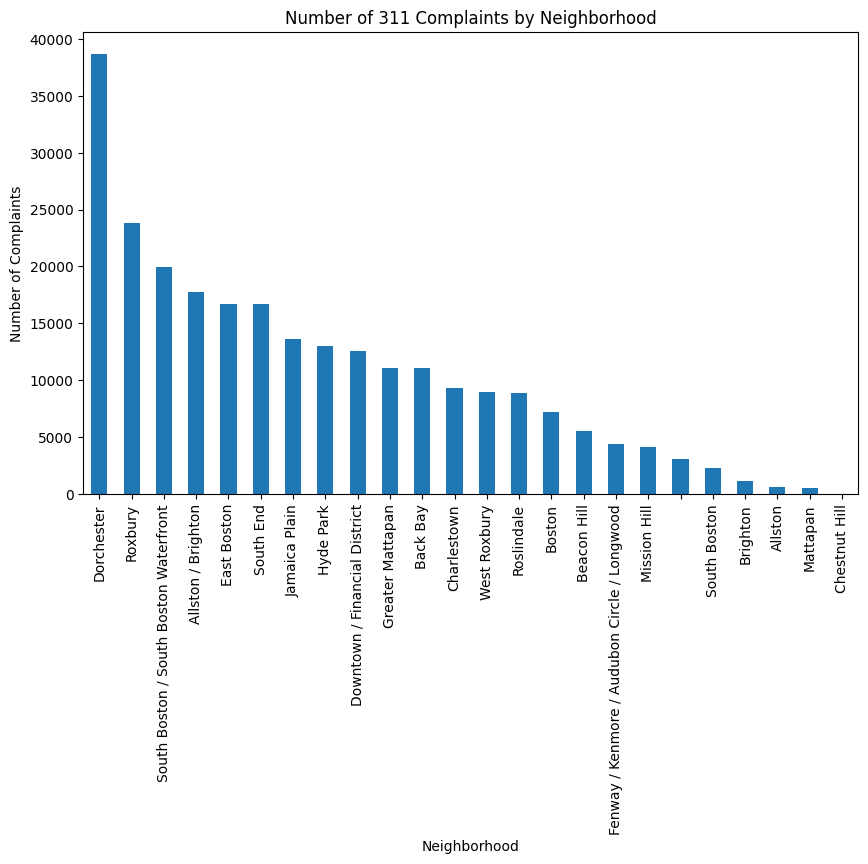

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the Boston 311 dataset
url = 'https://data.boston.gov/dataset/8048697b-ad64-4bfc-b090-ee00169f2323/resource/6ff6a6fd-3141-4440-a880-6f60a37fe789/download/tmpcv_10m2s.csv'
boston311 = pd.read_csv(url)

# Task 1: Report the number of unique neighborhoods
unique_neighborhoods = boston311['neighborhood'].nunique()
print(f'Number of unique neighborhoods: {unique_neighborhoods}')

# Task 2: Visualize the number of complaints by neighborhood as a bar plot
complaints_by_neighborhood = boston311['neighborhood'].value_counts()

# Plot the number of complaints per neighborhood
plt.figure(figsize=(10, 6))
complaints_by_neighborhood.plot(kind='bar')
plt.title('Number of 311 Complaints by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Complaints')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()


In [5]:
import pandas as pd
import urllib

# Parameters for year and borough
year = 2015
boro = 'brooklyn'

# filename and URL
fname = f'{year}_{boro}.xls'
url = f'https://www1.nyc.gov/assets/finance/downloads/pdf/rolling_sales/annualized-sales/{year}/{fname}'

# Display the first few rows to inspect the data
print(re_sales.head())


   BOROUGH\n             NEIGHBORHOOD\n  \
0          3  BATH BEACH                  
1          3  BATH BEACH                  
2          3  BATH BEACH                  
3          3  BATH BEACH                  
4          3  BATH BEACH                  

                      BUILDING CLASS CATEGORY\n TAX CLASS AT PRESENT\n  \
0  01  ONE FAMILY DWELLINGS                                          1   
1  01  ONE FAMILY DWELLINGS                                          1   
2  01  ONE FAMILY DWELLINGS                                          1   
3  01  ONE FAMILY DWELLINGS                                          1   
4  01  ONE FAMILY DWELLINGS                                          1   

   BLOCK\n  LOT\n EASE-MENT\n BUILDING CLASS AT PRESENT\n  \
0     6360     22                                      A5   
1     6361     17                                      A5   
2     6371     60                                      A9   
3     6372     48                                   

##Dataset 2. Real-estate data sales (XLS)
Average price per square foot per zip code

Top 3 ZIP codes with the highest price per square foot:
            SALE PRICE\n  GROSS SQUARE FEET\n  PRICE PER SQFT
ZIP CODE\n                                                   
11249          338230702               321132     1053.245089
11215          772915749              1174050      658.332907
11201          950488674              1476528      643.732238


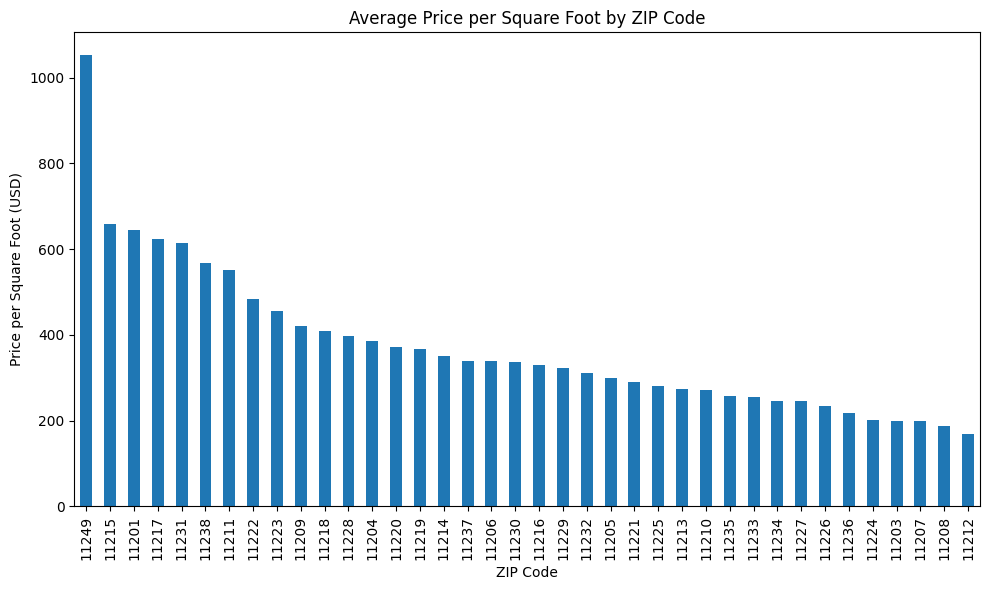

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter: Records with both price and square footage greater than zero (include only the records higher than zero price and footage)
filtered_data = re_sales[(re_sales['SALE PRICE\n'] > 0) & (re_sales['GROSS SQUARE FEET\n'] > 0)]

# Group by ZIP code and calculate cumulative price and square footage ("group_by" to create an aggregate with cumulative price and sq foot size)
grouped_data = filtered_data.groupby('ZIP CODE\n').agg({'SALE PRICE\n': 'sum', 'GROSS SQUARE FEET\n': 'sum'})

# Average price per square foot
grouped_data['PRICE PER SQFT'] = grouped_data['SALE PRICE\n'] / grouped_data['GROSS SQUARE FEET\n']

# Data by price per square foot in descending order
sorted_data = grouped_data.sort_values('PRICE PER SQFT', ascending=False)

# Top three ZIP codes with the highest average price per square foot
top_3_zipcodes = sorted_data.head(3)
print("Top 3 ZIP codes with the highest price per square foot:")
print(top_3_zipcodes)

# Average price per square foot for each ZIP code
sorted_data['PRICE PER SQFT'].plot(kind='bar', figsize=(10, 6), title="Average Price per Square Foot by ZIP Code")

# Display the plot
plt.ylabel('Price per Square Foot (USD)')
plt.xlabel('ZIP Code')
plt.tight_layout()
plt.show()




##Dataset 4. COVID-19 Data by ZIP Code


In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Dataset
url = 'https://raw.githubusercontent.com/nychealth/coronavirus-data/7953c97d1e58bbed9934ea04affb12ca74d9c0fb/data-by-modzcta.csv'
df = pd.read_csv(url)

# First few rows and columns of the dataset:
print(df.head())
print(df.columns)


   MODIFIED_ZCTA                        NEIGHBORHOOD_NAME BOROUGH_GROUP  \
0          10001               Chelsea/NoMad/West Chelsea     Manhattan   
1          10002                Chinatown/Lower East Side     Manhattan   
2          10003  East Village/Gramercy/Greenwich Village     Manhattan   
3          10004                       Financial District     Manhattan   
4          10005                       Financial District     Manhattan   

   COVID_CASE_COUNT  COVID_CASE_RATE  POP_DENOMINATOR  COVID_DEATH_COUNT  \
0               441          1871.58         23563.03                 26   
1              1335          1739.29         76755.41                161   
2               543          1009.26         53801.62                 35   
3                40          1095.71          3650.61                  1   
4                96          1143.39          8396.11                  2   

   COVID_DEATH_RATE  PERCENT_POSITIVE  TOTAL_COVID_TESTS  
0            110.34              

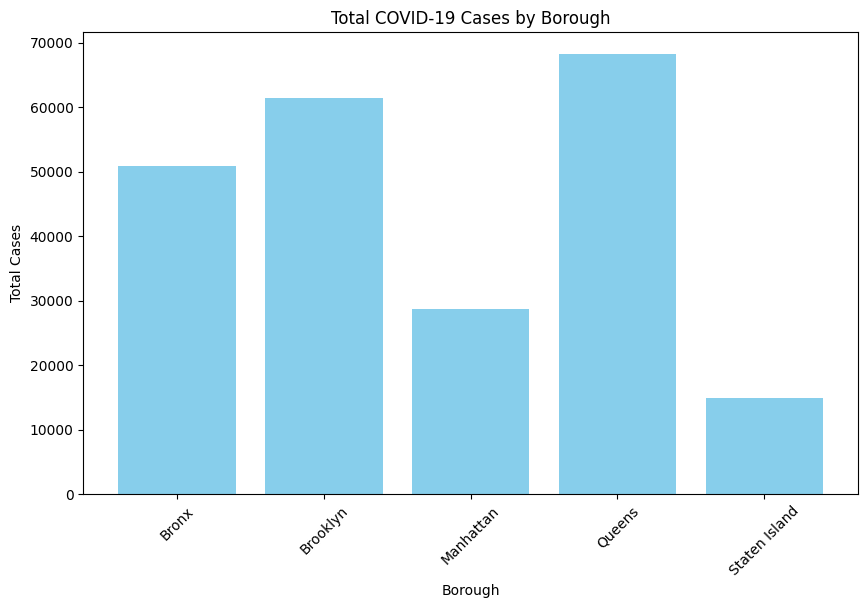

In [8]:
# Grouped by borough and calculated the total cases
borough_cases = df.groupby('BOROUGH_GROUP')['COVID_CASE_COUNT'].sum().reset_index()

# Total cases by Borough
plt.figure(figsize=(10, 6))
plt.bar(borough_cases['BOROUGH_GROUP'], borough_cases['COVID_CASE_COUNT'], color='skyblue')
plt.title("Total COVID-19 Cases by Borough")
plt.xlabel("Borough")
plt.ylabel("Total Cases")
plt.xticks(rotation=45)
plt.show()


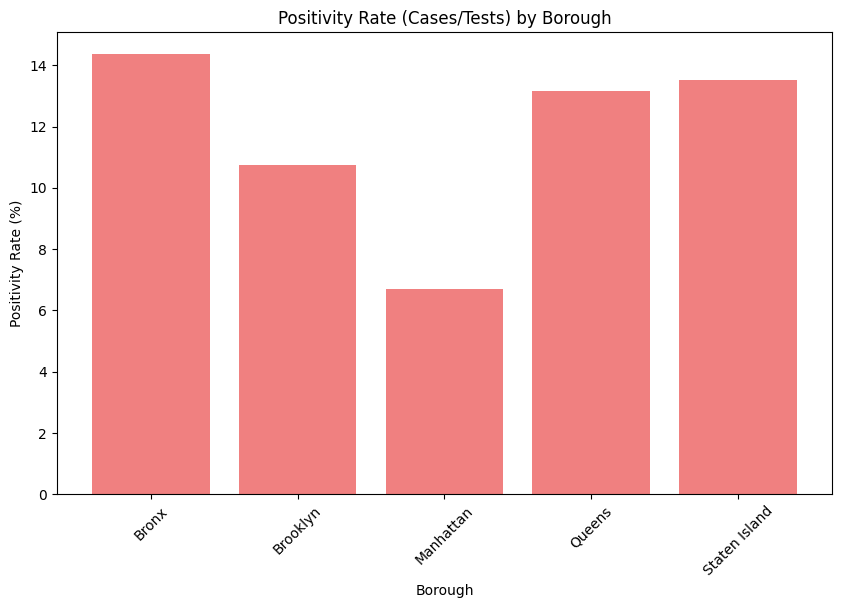

In [9]:
# Positivity rate for each borough
borough_tests = df.groupby('BOROUGH_GROUP').agg({
    'COVID_CASE_COUNT': 'sum',
    'TOTAL_COVID_TESTS': 'sum'
}).reset_index()

borough_tests['Positivity Rate (%)'] = 100 * borough_tests['COVID_CASE_COUNT'] / borough_tests['TOTAL_COVID_TESTS']

# Visualize the positivity rate as a bar plot
plt.figure(figsize=(10, 6))
plt.bar(borough_tests['BOROUGH_GROUP'], borough_tests['Positivity Rate (%)'], color='lightcoral')
plt.title("Positivity Rate (Cases/Tests) by Borough")
plt.xlabel("Borough")
plt.ylabel("Positivity Rate (%)")
plt.xticks(rotation=45)
plt.show()


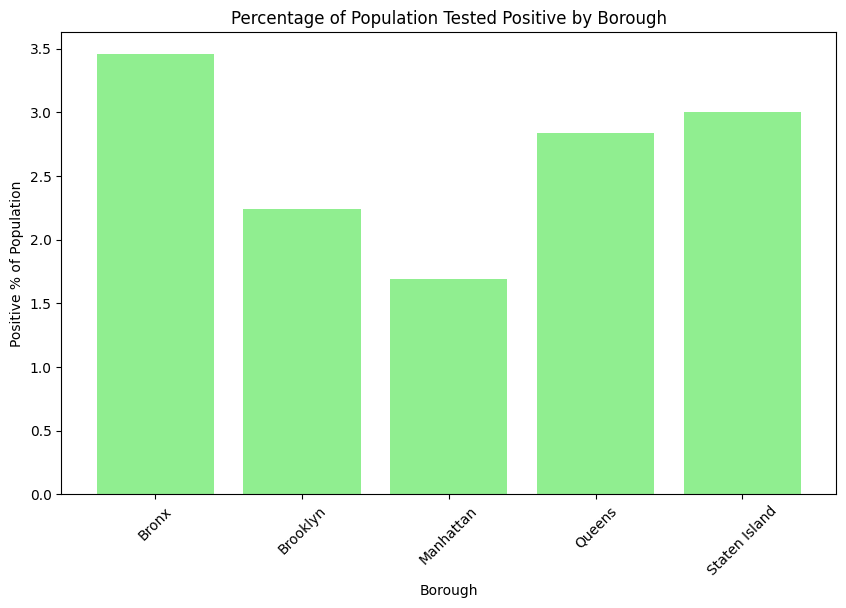

In [10]:
# Borough populations from the 2020 U.S. Census
borough_population = {
    'Bronx': 1472654,
    'Brooklyn': 2736074,
    'Manhattan': 1694251,
    'Queens': 2405464,
    'Staten Island': 495747
}

# population data
population_df = pd.DataFrame(list(borough_population.items()), columns=['BOROUGH_GROUP', 'BOROUGH_POPULATION'])

# Merged population data with the borough tests data
borough_positive_population = pd.merge(borough_tests, population_df, on='BOROUGH_GROUP')

# percentage of population that has tested positive
borough_positive_population['Positive % of Population'] = 100 * borough_positive_population['COVID_CASE_COUNT'] / borough_positive_population['BOROUGH_POPULATION']

# Visualize as a bar plot
plt.figure(figsize=(10, 6))
plt.bar(borough_positive_population['BOROUGH_GROUP'], borough_positive_population['Positive % of Population'], color='lightgreen')
plt.title("Percentage of Population Tested Positive by Borough")
plt.xlabel("Borough")
plt.ylabel("Positive % of Population")
plt.xticks(rotation=45)
plt.show()
